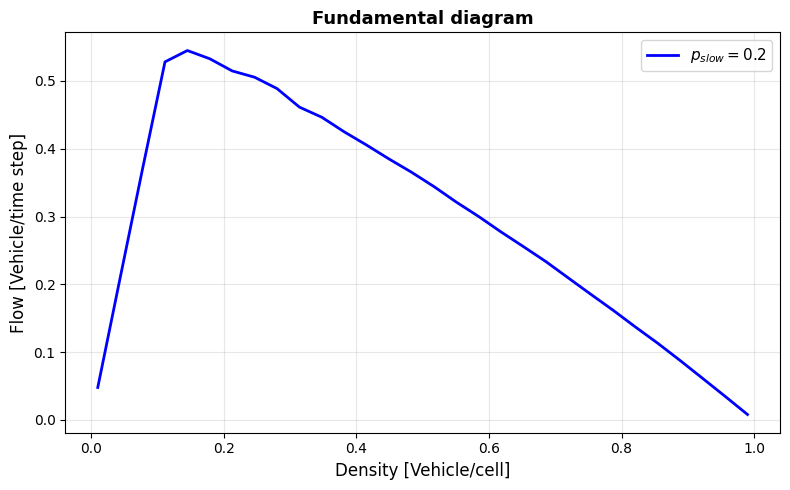

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def update(cells, v, v_max, p_slow):
    N_cell = len(cells)
    positions = np.where(cells == 1)[0]
    positions_sorted = np.sort(positions)
    n_cars = len(positions_sorted)
    d = np.zeros(N_cell, dtype=int)

    for idx in range(n_cars):
        i = positions_sorted[idx]
        j = positions_sorted[(idx + 1) % n_cars]
        dist = (j - i - 1) % N_cell
        d[i] = dist

    v_new = np.minimum(v + 1, v_max)
    v_new = np.minimum(v_new, d)
    rand_vals = np.random.rand(N_cell)
    v_new[(cells == 1) & (rand_vals < p_slow) & (v_new > 0)] -= 1

    cells_new = np.zeros_like(cells)
    v_result = np.zeros_like(v)
    for i in positions_sorted:
        move = v_new[i]
        new_pos = (i + move) % N_cell
        if cells_new[new_pos] == 0:
            cells_new[new_pos] = 1
            v_result[new_pos] = v_new[i]
        else:
            cells_new[i] = 1
            v_result[i] = 0
    return cells_new, v_result

# Параметры модели из задания
N_cell = 1000
T_e = 500
T_s = 2000
v_max = 5
p_slow = 0.2

densities = np.linspace(0.01, 0.99, 30)
flows = []

for rho in densities:
    N = int(rho * N_cell)
    cells = np.zeros(N_cell, dtype=int)
    cars_idx = np.random.choice(N_cell, N, replace=False)
    cells[cars_idx] = 1
    v = np.random.randint(0, v_max + 1, size=N_cell)
    v[cells == 0] = 0
    
    speeds = []
    for step in range(T_s + T_e):
        cells, v = update(cells, v, v_max, p_slow)
        if step >= T_s:
            # Считаем поток как количество пройденных клеток за шаг
            speeds.append(np.sum(v[cells == 1]))
    
    # Средняя скорость за установившийся режим
    v_avg = np.mean(speeds) / N if N > 0 else 0
    # Поток = плотность * средняя скорость
    q = rho * v_avg
    flows.append(q)

plt.figure(figsize=(8, 5))
plt.plot(densities, flows, 'b-', linewidth=2, label=f'$p_{{slow}}={p_slow}$')
plt.xlabel('Density [Vehicle/cell]', fontsize=12)
plt.ylabel('Flow [Vehicle/time step]', fontsize=12)
plt.title('Fundamental diagram', fontsize=13, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\vtoma\AppData\Local\Temp\ipykernel_18176\535233911.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


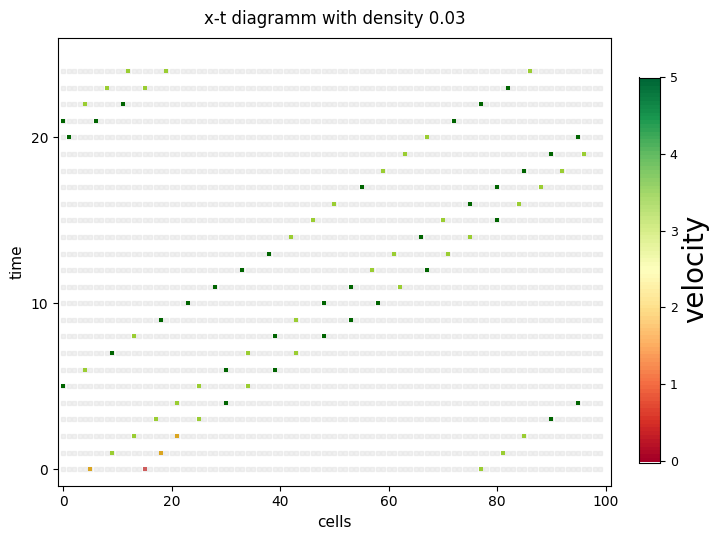

C:\Users\vtoma\AppData\Local\Temp\ipykernel_18176\535233911.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


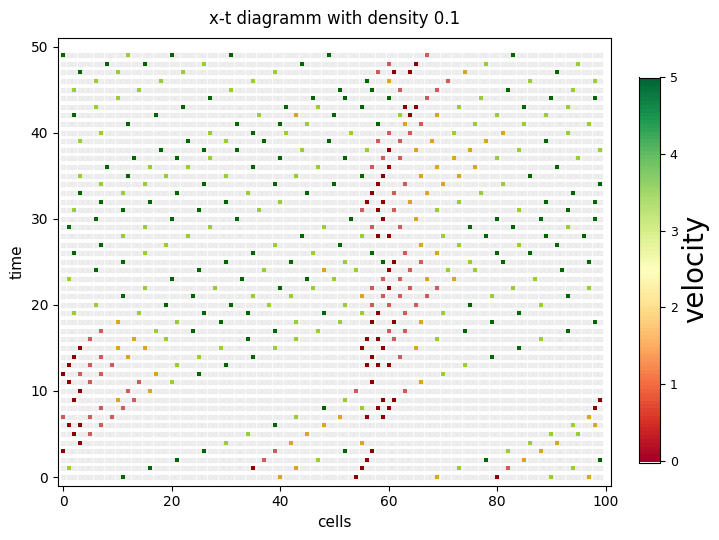

In [40]:
def xt_diagram(N_cell=100, N=3, steps=25, v_max=5, p_slow=0.5):
    cells = np.zeros(N_cell, dtype=int)
    cars_idx = np.random.choice(N_cell, N, replace=False)
    cells[cars_idx] = 1
    v = np.random.randint(0, v_max + 1, size=N_cell)
    v[cells == 0] = 0

    track = np.zeros((steps, N_cell), dtype=int)
    for t in range(steps):
        track[t] = v
        cells, v = update(cells, v, v_max, p_slow)
    return track

for rho, steps in [(0.03, 25), (0.1, 50)]:
    N = int(100 * rho)
    track = xt_diagram(N_cell=100, N=N, steps=steps, v_max=5, p_slow=0.5)
    
    plt.figure(figsize=(7, 5.5))
    
    for i in range(steps):
        for j in range(100):
            plt.plot(j, i, 's', color='lightgray', markersize=2.5, alpha=0.3)
    
    colors_map = {
        0: 'white',      
        1: '#8B0000',    
        2: '#CD5C5C',    
        3: '#DAA520',    
        4: '#9ACD32',    
        5: '#006400'     
    }
    
    for t in range(steps):
        for x in range(100):
            velocity = track[t, x]
            if velocity > 0:  
                plt.plot(x, t, 's', color=colors_map[velocity], 
                        markersize=3.5, markeredgewidth=0)
    
    plt.xlabel("cells", fontsize=11)
    plt.ylabel("time", fontsize=11)
    
    plt.xlim(-1, 101)
    plt.ylim(-1, steps+1)
    
    plt.xticks(np.arange(0, 101, 20), fontsize=10)
    plt.yticks(np.arange(0, steps+1, 10), fontsize=10)
    
    from matplotlib.patches import Rectangle
    from matplotlib.collections import PatchCollection
    
    cbar_ax = plt.axes([0.92, 0.15, 0.03, 0.7])
    
    gradient = np.linspace(0, 5, 100).reshape(100, 1)
    cbar_ax.imshow(gradient, aspect='auto', cmap=plt.cm.RdYlGn, origin='lower')
    
    cbar_ax.set_xticks([])
    cbar_ax.set_yticks(np.linspace(0, 100, 6))
    cbar_ax.set_yticklabels(['0', '1', '2', '3', '4', '5'], fontsize=9)
    cbar_ax.yaxis.tick_right()
    cbar_ax.text(1.5, 50, 'velocity', rotation=90, va='center', ha='left', 
                 fontsize=20, transform=cbar_ax.transData)
    
    plt.sca(plt.gcf().axes[0])  
    

    plt.title(f"x-t diagramm with density {rho}", fontsize=12, pad=10)
    
    plt.gca().set_facecolor('white')
    
    plt.tight_layout()
    plt.subplots_adjust(right=0.88)
    
    plt.show()


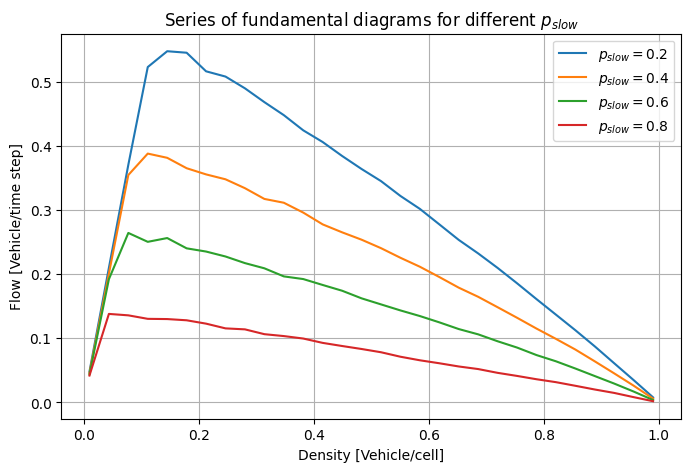

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def update(cells, v, v_max, p_slow):
    N_cell = len(cells)
    positions = np.where(cells == 1)[0]
    positions_sorted = np.sort(positions)
    n_cars = len(positions_sorted)
    d = np.zeros(N_cell, dtype=int)
    for idx in range(n_cars):
        i = positions_sorted[idx]
        j = positions_sorted[(idx + 1) % n_cars]
        dist = (j - i - 1) % N_cell
        d[i] = dist
    v_new = np.minimum(v + 1, v_max)
    v_new = np.minimum(v_new, d)
    rand_vals = np.random.rand(N_cell)
    v_new[(cells == 1) & (rand_vals < p_slow) & (v_new > 0)] -= 1
    cells_new = np.zeros_like(cells)
    v_result = np.zeros_like(v)
    for i in positions_sorted:
        move = v_new[i]
        new_pos = (i + move) % N_cell
        if cells_new[new_pos] == 0:
            cells_new[new_pos] = 1
            v_result[new_pos] = v_new[i]
        else:
            cells_new[i] = 1
            v_result[i] = 0
    return cells_new, v_result

N_cell = 1000
T_e = 500
T_s = 2000
v_max = 5
densities = np.linspace(0.01, 0.99, 30)
pslow_list = [0.2, 0.4, 0.6, 0.8]  # Список p_slow

plt.figure(figsize=(8,5))
for p_slow in pslow_list:
    flows = []
    for rho in densities:
        N = int(rho * N_cell)
        cells = np.zeros(N_cell, dtype=int)
        cars_idx = np.random.choice(N_cell, N, replace=False)
        cells[cars_idx] = 1
        v = np.random.randint(0, v_max + 1, size=N_cell)
        v[cells == 0] = 0
        cells, v = cells.copy(), v.copy()
        speeds = []
        for step in range(T_s + T_e):
            cells, v = update(cells, v, v_max, p_slow)
            if step >= T_s:
                speeds.append(np.sum(v[cells == 1]))
        v_avg = np.mean(speeds) / N if N > 0 else 0
        q = rho * v_avg
        flows.append(q)
    plt.plot(densities, flows, label=f'$p_{{slow}}={p_slow}$')

plt.xlabel('Density [Vehicle/cell]')
plt.ylabel('Flow [Vehicle/time step]')
plt.title('Series of fundamental diagrams for different $p_{slow}$')
plt.legend()
plt.grid()
plt.show()


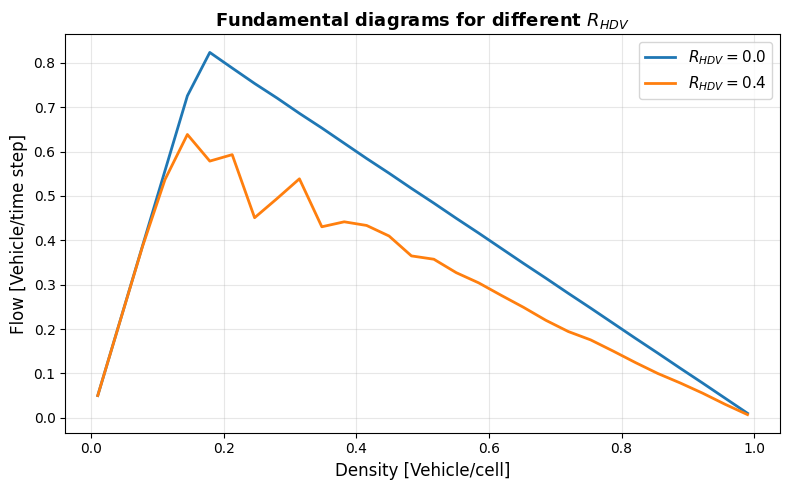

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def update(cells, v, v_max, p_slow_array):
    N_cell = len(cells)
    positions = np.where(cells == 1)[0]
    positions_sorted = np.sort(positions)
    n_cars = len(positions_sorted)
    d = np.zeros(N_cell, dtype=int)
    for idx in range(n_cars):
        i = positions_sorted[idx]
        j = positions_sorted[(idx + 1) % n_cars]
        dist = (j - i - 1) % N_cell
        d[i] = dist
    v_new = np.minimum(v + 1, v_max)
    v_new = np.minimum(v_new, d)
    rand_vals = np.random.rand(N_cell)
    v_new[(cells == 1) & (rand_vals < p_slow_array) & (v_new > 0)] -= 1
    cells_new = np.zeros_like(cells)
    v_result = np.zeros_like(v)
    for i in positions_sorted:
        move = v_new[i]
        new_pos = (i + move) % N_cell
        if cells_new[new_pos] == 0:
            cells_new[new_pos] = 1
            v_result[new_pos] = v_new[i]
        else:
            cells_new[i] = 1
            v_result[i] = 0
    return cells_new, v_result

N_cell = 2000
T_e = 50
T_s = 2000
v_max = 5
densities = np.linspace(0.01, 0.99, 30)
R_list = [0.0, 0.4]  # Только HDV=0 и HDV=0.4
p_slow_human = 0.5

plt.figure(figsize=(8, 5))
for R_HDV in R_list:
    flows = []
    for rho in densities:
        N = int(rho * N_cell)
        cells = np.zeros(N_cell, dtype=int)
        cars_idx = np.random.choice(N_cell, N, replace=False)
        cells[cars_idx] = 1
        v = np.random.randint(0, v_max + 1, size=N_cell)
        v[cells == 0] = 0
        
        # Формируем массив p_slow для каждой машины
        p_slow_array = np.zeros(N_cell)
        N_human = int(R_HDV * N)
        if N_human > 0:
            # среди выбранных позиций автомобилей случайно выбираем "человеческие"
            human_idx = np.random.choice(cars_idx, N_human, replace=False)
            p_slow_array[human_idx] = p_slow_human
        
        speeds = []
        for step in range(T_s + T_e):
            cells, v = update(cells, v, v_max, p_slow_array)
            if step >= T_s:
                speeds.append(np.sum(v[cells == 1]))
        
        v_avg = np.mean(speeds) / N if N > 0 else 0
        q = rho * v_avg
        flows.append(q)
    
    plt.plot(densities, flows, linewidth=2, label=f'$R_{{HDV}}={R_HDV:.1f}$')

plt.xlabel('Density [Vehicle/cell]', fontsize=12)
plt.ylabel('Flow [Vehicle/time step]', fontsize=12)
plt.title('Fundamental diagrams for different $R_{HDV}$', fontsize=13, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


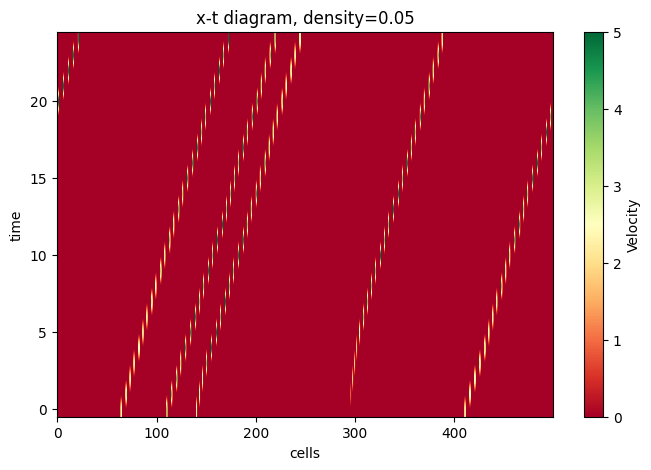

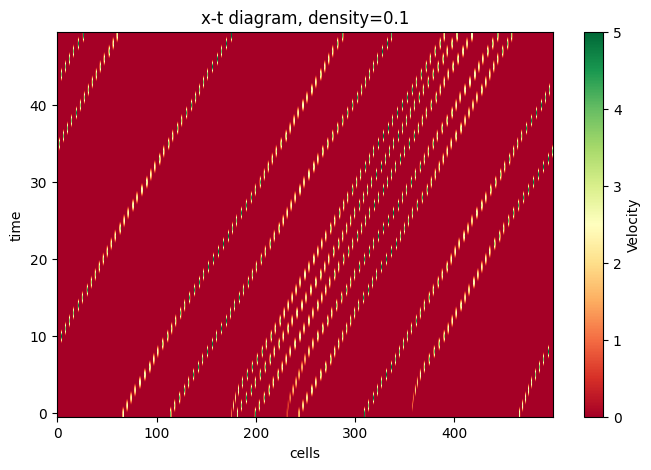

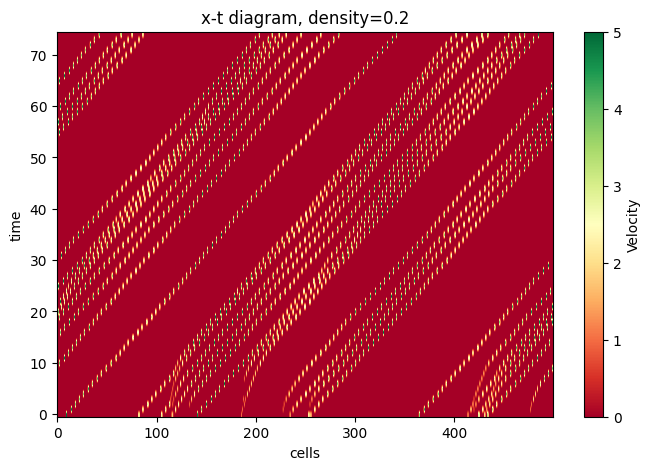

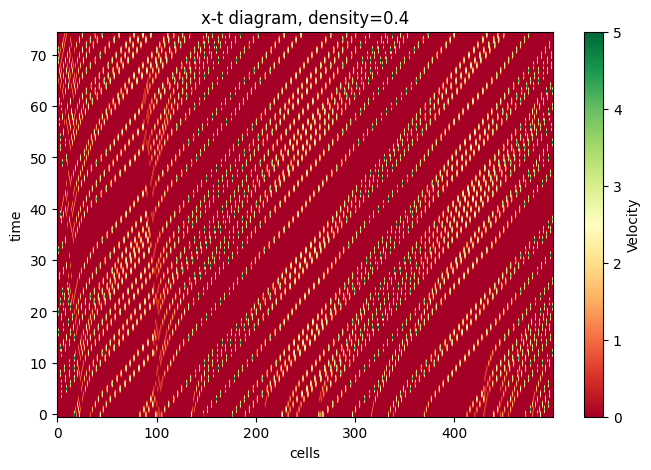

In [67]:
def xt_diagram(N_cell=100, N=3, steps=25, v_max=5, p_slow=0.5):
    cells = np.zeros(N_cell, dtype=int)
    cars_idx = np.random.choice(N_cell, N, replace=False)
    cells[cars_idx] = 1
    v = np.random.randint(0, v_max + 1, size=N_cell)
    v[cells == 0] = 0

    track = np.zeros((steps, N_cell), dtype=int)
    for t in range(steps):
        track[t] = v
        cells, v = update(cells, v, v_max, p_slow)
    return track

for rho, steps in [(0.05, 25), (0.1, 50), (0.2, 75), (0.4, 75)]:
    N = int(100 * rho)
    track = xt_diagram(N_cell=500, N=N, steps=steps, v_max=5, p_slow=0.5)
    plt.figure(figsize=(8, 5))
    plt.imshow(track, cmap='RdYlGn', aspect='auto', origin='lower')
    plt.colorbar(label='Velocity')
    plt.xlabel("cells")
    plt.ylabel("time")
    plt.title(f"x-t diagram, density={rho}")
    plt.show()


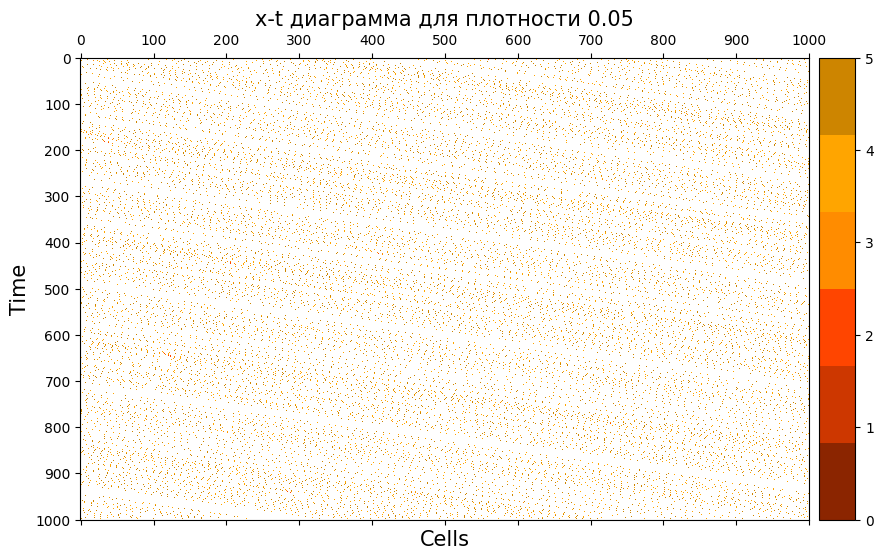

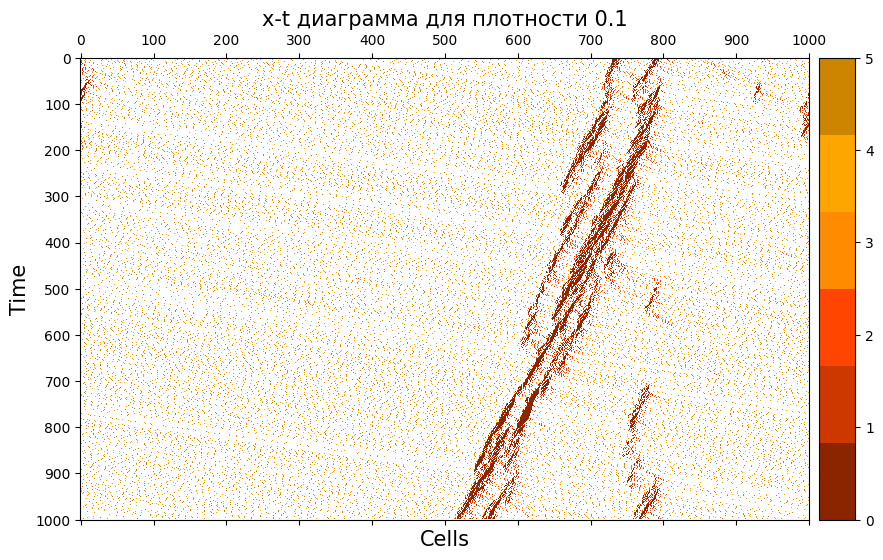

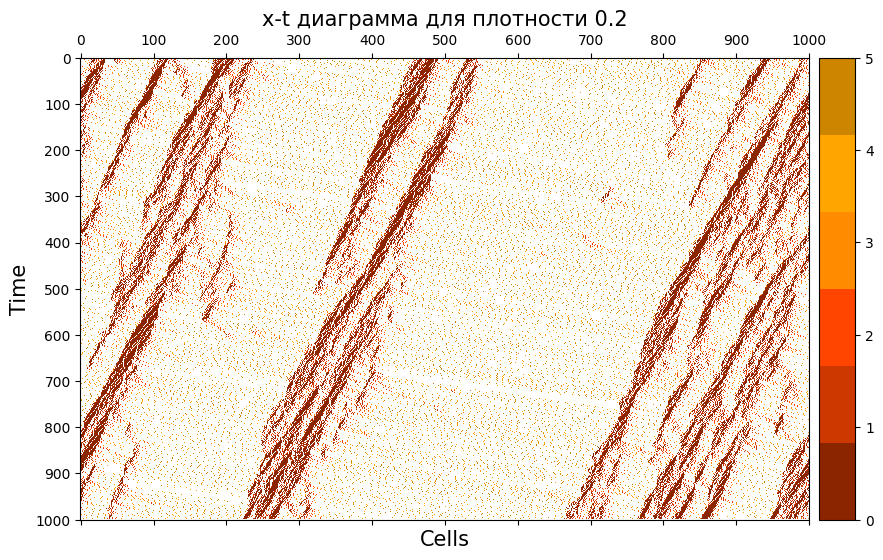

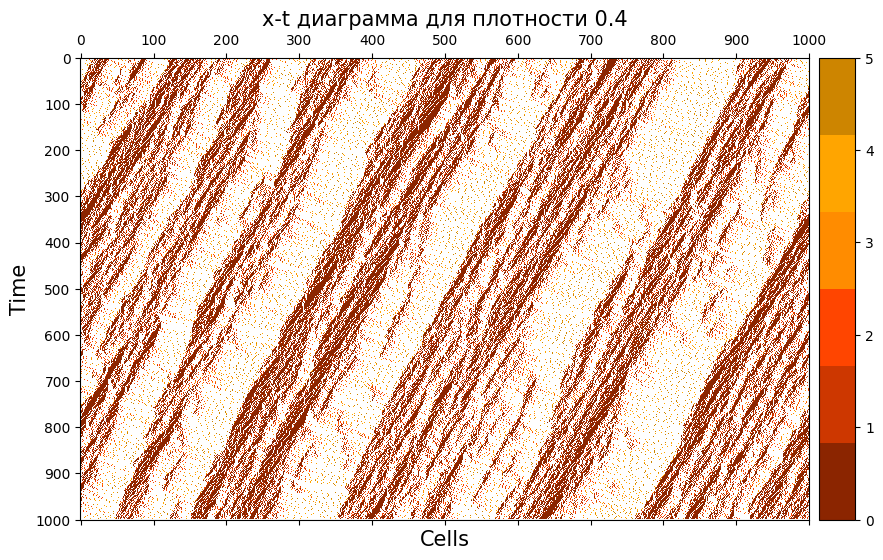

In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

n = 1000
Te = 500
v_max = 5
Ts = 2000
np.random.seed(42)


def change_field(road, v):
    new_road = np.zeros(n)
    car_pos = np.where(road == 1)[0]
    next_car_pos = np.roll(car_pos, -1)
    v_new = np.minimum(v[car_pos]+1, v_max)
    diff = (next_car_pos - car_pos - 1) % n
    v_new = np.minimum(v_new, diff)
    mask = np.random.rand(int(np.sum(road))) < 0.5
    v_new[mask] -= 1
    v_new = np.maximum(v_new, 0)
    new_pos = (car_pos+v_new) % n
    new_road[new_pos] = 1
    v[:] = 0
    v[new_pos] = v_new
    return new_road, v, np.sum(v)


def main(dens, kind='fundamental', te=Te):
    speed_matrix = np.zeros((te, n), dtype=int)
    density = dens
    n_cars = int(n * density)
    road = np.zeros(n, dtype=int)
    v = np.zeros(n, dtype=int)
    pos = np.random.choice(n, n_cars)
    road[pos] = 1
    for _ in range(Ts):
        road, v, _ = change_field(road, v)
    v_sum = 0
    for i in range(te):
        road, v, temp = change_field(road, v)
        car_pos = np.where(road == 1)[0]
        speed_vector = v.copy()
        speed_vector[car_pos] += 1
        speed_matrix[i] = speed_vector
        v_sum += temp
    if kind == 'fundamental':
        return density*v_sum/(te*n_cars)
    elif kind == 'xt':
        return speed_matrix
    else:
        return None


def plot_fundamental():
    fontsize = 15
    density = np.linspace(0.01, 1.0, 30)
    y = [main(dens) for dens in density]
    plt.figure(figsize=(15, 8))
    plt.plot(density, y, label='p_slow = 0.5')
    plt.grid(True)
    plt.legend()
    plt.ylim(0, 0.6)
    plt.xlim(0, 1)
    plt.xticks(np.arange(0, 1, 0.1))
    plt.title('Fundamental diagramm', fontsize=fontsize)
    plt.xlabel('Density', fontsize=fontsize)
    plt.ylabel('Flow', fontsize=fontsize)
    plt.savefig('fundamental.png')
    plt.show()


def plot_xt():
    density = [0.05, 0.1, 0.2, 0.4]
    fontsize = 15
    te = 1000
    for dens in density:
        dens = round(dens, 2)
        # Более темные версии оригинальных цветов
        colors = ['white', "#8B2500", "#CD3700", "#FF4500", 
          "#FF8C00", "#FFA500", "#CD8500"]
        cmap = mcolors.ListedColormap(colors)
        bar_cmap = mcolors.ListedColormap(colors[1:])
        speed_matrix = main(dens, kind='xt', te=te)
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.set_title(f'x-t диаграмма для плотности {dens}', fontsize=fontsize)

        img = ax.matshow(speed_matrix,
                        #aspect='auto',
                        #interpolation='none',
                        cmap=cmap,
                        #origin='lower')
        )
        fake_im = ax.imshow(np.arange(0, 5.01, 1).reshape(
            1, -1), alpha=1, cmap=bar_cmap, aspect='auto')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes(position='right', size='5%', pad=0.1)
        plt.colorbar(fake_im, cax=cax)

        ax.set_xticks(np.arange(0, n+1, n//10))
        ax.set_yticks(np.arange(0, te+1, te//10))
        ax.set_xlabel('Cells', fontsize=fontsize)
        ax.set_ylabel('Time', fontsize=fontsize)
        fig.savefig(f'xt_{dens}.png')


if __name__ == '__main__':
    plot_xt()